In [1]:
# Import the libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load in the data
data = tf.keras.datasets.mnist
(X_train_raw, y_train), (X_test_raw, y_test) = data.load_data()

# Scale the data to 0-1
X_train = X_train_raw / 255.0
X_test = X_test_raw / 255.0

# Havce a look at the shape
print('Train data shape:', X_train.shape)
print('Test data shape:', X_test.shape)

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [3]:
# Define the layers
input_layer = tf.keras.layers.Flatten(input_shape=(28,28)) # Converts image data to 'flat' vector representation
hidden_one = tf.keras.layers.Dense(128, activation='relu') # The first hidden layer with 128 neurons
dropout = tf.keras.layers.Dropout(0.2) # Randomly sets 20% of the neurons to 0 during each forward pass
output_layer = tf.keras.layers.Dense(10, activation='softmax')

In [4]:
# Create the model
model = tf.keras.models.Sequential([input_layer, 
                                    hidden_one, 
                                    dropout, 
                                    output_layer])

In [5]:
# Define how the model should be trained
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
result = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2952 - accuracy: 0.9136 - val_loss: 0.1400 - val_accuracy: 0.9585
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1426 - accuracy: 0.9575 - val_loss: 0.0987 - val_accuracy: 0.9695
Epoch 3/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1091 - accuracy: 0.9675 - val_loss: 0.0844 - val_accuracy: 0.9750
Epoch 4/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0886 - accuracy: 0.9728 - val_loss: 0.0762 - val_accuracy: 0.9766
Epoch 5/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0758 - accuracy: 0.9758 - val_loss: 0.0779 - val_accuracy: 0.9774
Epoch 6/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0652 - accuracy: 0.9790 - val_loss: 0.0722 - val_accuracy: 0.9771
Epoch 7/10
60000/60000 [==============================]

In [7]:
# Print the results
print("Train score:", model.evaluate(x=X_train, y=y_train, verbose=0)[1]);
print("Test score:", model.evaluate(x=X_test, y=y_test, verbose=0)[1]);

Train score: 0.99413335
Test score: 0.9786


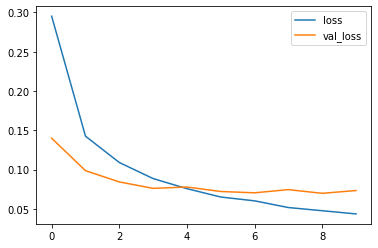

In [8]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='loss');
plt.plot(result.history['val_loss'], label='val_loss');
plt.legend();

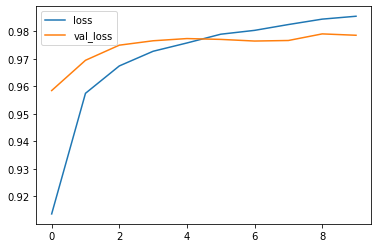

In [9]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['accuracy'], label='loss');
plt.plot(result.history['val_accuracy'], label='val_loss');
plt.legend();

Confusion matrix, without Normalization
[[ 970    1    2    1    0    1    2    1    2    0]
 [   0 1128    3    0    0    1    2    0    1    0]
 [   4    1 1013    3    1    0    1    6    3    0]
 [   1    0    4  992    0    6    0    3    2    2]
 [   1    0    3    0  949    1    4    1    2   21]
 [   2    0    0    8    0  874    2    1    4    1]
 [   6    2    0    1    4    8  936    0    1    0]
 [   1    5   15    4    1    0    0  994    1    7]
 [   1    0    5    3    1    6    3    4  946    5]
 [   2    2    0    7    4    4    0    3    3  984]]


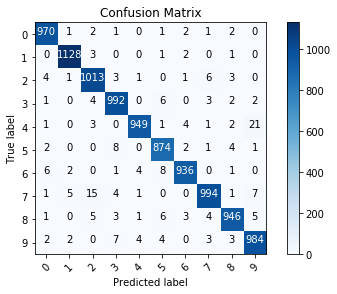

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normazilation can be apploed by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without Normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Index: 2730


Text(0.5, 1.0, 'True label: 7 Predicted: 4')

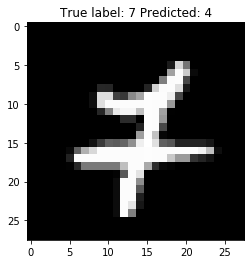

In [17]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0] # Get indicies of misclassifications
i = np.random.choice(misclassified_idx)
print(f'Index: {i}')
plt.imshow(X_test[i], cmap='gray')
plt.title(f'True label: {y_test[i]} Predicted: {p_test[i]}')